In [1]:
import sympy as sp
sp.init_printing()

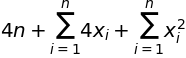

In [2]:
n, m, c, i = sp.symbols("n m c i")
x = sp.IndexedBase('x')
y = sp.IndexedBase('y')
sp.Sum((x[i]+2)**2, (i, 1, n)).expand().doit()

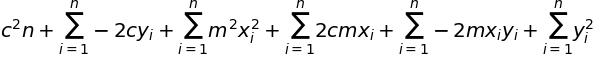

In [3]:
d = x[i]*m + c - y[i]
s = sp.Sum(d**2, (i, 1, n))
s.expand().doit()


In [4]:
Sx, lSx = sp.symbols("S_x"), sp.Sum(x[i], (i, 1, n))
Sx2, lSx2 = sp.symbols("S_x2"), sp.Sum(x[i]**2, (i, 1, n))
Sy, lSy = sp.symbols("S_y"), sp.Sum(y[i], (i, 1, n))
Sy2, lSy2 = sp.symbols("S_y2"), sp.Sum(y[i]**2, (i, 1, n))
Sxy, lSxy = sp.symbols("S_xy"), sp.Sum(x[i]*y[i], (i, 1, n))

#s = s.subs(n, 5)
s = s.expand().doit().subs({lSy2: Sy2, lSy: Sy, lSx2: Sx2, lSx: Sx})



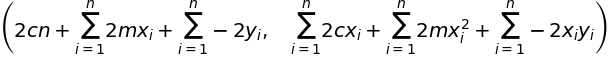

In [5]:
sp.diff(s, c), sp.diff(s, m)

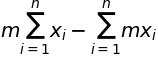

In [6]:
# Can't find a way to cancel out these summation terms!!!
k = m*sp.Sum((x[i]), (i, 1, n)) - sp.Sum((x[i])*m, (i, 1, n))
k

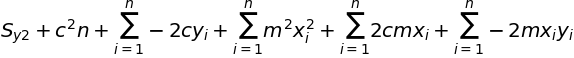

In [7]:
s.expand().doit()


In [8]:
# give up and type in the substitution
s1 = Sy2 + n*c**2 - 2*c*Sy + m**2*Sx2 + 2*c*m*Sx - 2*m*Sxy
k = (s - s1)
k = k.subs({Sy2: lSy2, Sy: lSy, Sx2: lSx2, Sx: lSx, Sxy: lSxy})
k.subs(n, 5).doit().expand()  # <-- evidence that the equations are right

In [9]:
sp.diff(s1, c), sp.diff(s1, m)


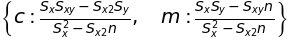

In [10]:
mc = sp.solve([sp.diff(s1, c), sp.diff(s1, m)], [m, c])
mc

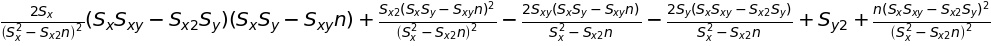

In [11]:
r = s1.subs(mc)
r

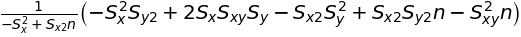

In [12]:
r.simplify()

In [13]:
# Now the connected line to the left

In [14]:
p = sp.IndexedBase('p')
q = sp.IndexedBase('q')
c0, x0, j = sp.symbols("c0 x0 j")

Tx, lTx = sp.symbols("T_x"), sp.Sum(p[i], (i, 1, j))
Tx2, lTx2 = sp.symbols("T_x2"), sp.Sum(p[i]**2, (i, 1, j))
Ty, lTy = sp.symbols("T_y"), sp.Sum(q[i], (i, 1, j))
Ty2, lTy2 = sp.symbols("T_y2"), sp.Sum(q[i]**2, (i, 1, j))
Txy, lTxy = sp.symbols("T_xy"), sp.Sum(p[i]*q[i], (i, 1, j))


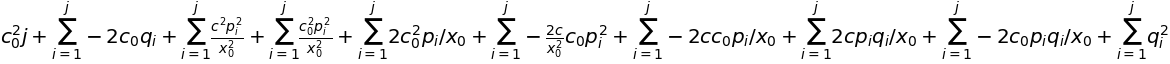

In [15]:
m0 = (c - c0)/(0 - x0)
d1 = p[i]*m0 + c0 - q[i]
t = sp.Sum(d1**2, (i, 1, j))
t.expand().doit()


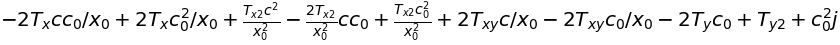

In [16]:
t1 = c0**2*j - Ty*2*c0 + Tx2*c**2/x0**2 + Tx2*c0**2/x0**2 + \
                              Tx*2*c0**2/x0 - Tx2*2*c*c0/x0**2 - Tx*c0*2*c/x0 + \
                                                                  Txy*2*c/x0 - Txy*2*c0/x0 + Ty2
t1

In [32]:
k = t - t1
k = k.subs({Ty2: lTy2, Ty: lTy, Tx2: lTx2, Tx: lTx, Txy: lTxy})
k.subs(j, 9).doit().expand()    # <--  got this right

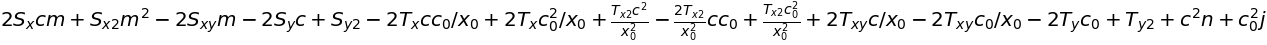

In [18]:
t1 + s1


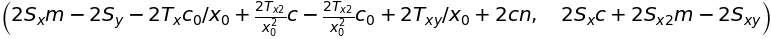

In [19]:
ts1 = t1 + s1
sp.diff(ts1, c), sp.diff(ts1, m)
#sp.diff(t1, c)

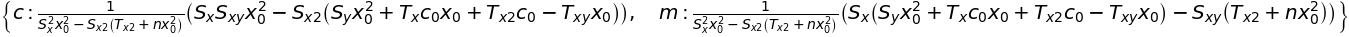

In [21]:
mc = sp.solve([sp.diff(ts1, c), sp.diff(ts1, m)], [m, c])
mc

In [22]:
print([mc[c]])
print([mc[m]])


[(S_x*S_xy*x0**2 - S_x2*(S_y*x0**2 + T_x*c0*x0 + T_x2*c0 - T_xy*x0))/(S_x**2*x0**2 - S_x2*(T_x2 + n*x0**2))]
[(S_x*(S_y*x0**2 + T_x*c0*x0 + T_x2*c0 - T_xy*x0) - S_xy*(T_x2 + n*x0**2))/(S_x**2*x0**2 - S_x2*(T_x2 + n*x0**2))]


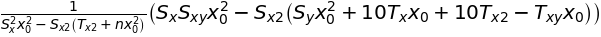

In [130]:
mc[c].subs(c0, 10)

In [ ]:
(S_y*x0**2 + T_x*c0*x0 + T_x2*c0 - T_xy*x0)
(S_y*x0**2 + T_x*c0*x0 + T_x2*c0 - T_xy*x0)

(S_x*S_xy*x0**2 - S_x2*cf)/
(S_x**2*x0**2 - S_x2*(T_x2 + n*x0**2))

(S_x*cf - S_xy*(T_x2 + n*x0**2))/
(S_x**2*x0**2 - S_x2*(T_x2 + n*x0**2))

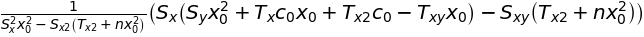

In [31]:
mc[m] #.subs({Tx:0, Tx2:0, Ty:0, Ty2:0, Txy:0}).simplify()